# Data Sampling and Distributions

<!-- ## Probability

Sample space - set of possible outcomes

- mutually exclusive
- collectively exhaustive
- right granualarity

**`TO BE DONE`** -->

## Sample

A sample(n) is a subset of data from larger dataset generally called population(N).

## Random Sampling 

- Select Items randomly from population, either with or without replacement(no duplicates: something is selected in sample then probability of that value to be selected again is 0).
- Random choice.
- A process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import animation
from IPython import display

%matplotlib inline

In [2]:
## selected randomly 

np.random.choice([12,11,56,23,10,5,17,50,30],4,replace=False)

array([12, 10,  5, 11])

In [3]:
np.random.choice([12,11,56,23,10,5,17,50,30],4,replace=True)

array([10, 10, 23, 23])

> Data quality in data science involves completeness,
consistency of format, cleanliness, and accuracy of individual data points.
Statistics adds the notion of representativeness

## Sampling Bias

when sample is selected in nonrandom way from a large population.
A sample that misrepresents the population.


### Self Selection Bias 

> In real world lets take movie review or reviews in general. People volunteerly going and giving review to a particular, creates a bias in statistical results. Because the reviewers are not randomly selected, these reviewers are generally who dislikes the item or belong to a group already or generally writes review for every item, selected themselves creating **self selection bias**.

### Statistical Bias
 
> Statisitcal bias refers to sampling error that are produced by sampling process. like gun shooting at a target. conceptually is should generate a random errors(doesn't the target). 

Bias occurs when measurements or observations are systematically in error because they are not
representative of the full population.

**Unbiased data examples**

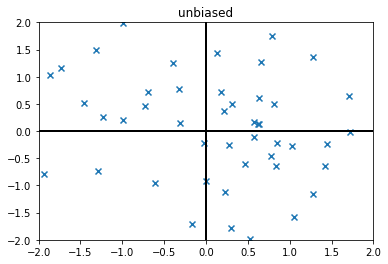

In [4]:
unbiased_data = np.random.normal(scale=1,size=(50,2))

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axhline(0,color='k',lw=2)
plt.axvline(0,color='k',lw=2)
plt.title("unbiased")
plt.scatter(unbiased_data[...,0],unbiased_data[...,1],marker='x')


**Biased data examples**

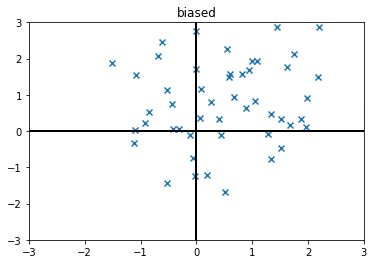

In [5]:
biased_data = np.random.normal(size=(50,2)) + 0.7

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(0,color='k',lw=2)
plt.axvline(0,color='k',lw=2)
plt.title("biased")
plt.scatter(biased_data[...,0],biased_data[...,1],marker='x')

### Selection Bias

> selectively choosing data- consciously or unconsciously, that it leads to misleading conclusion.

## Random Seeding 

- To get random choice generated but has to be generated everytime has to be same for peer checking or to generate same results. Get same randomly generated sequence everytime if seed value is determined.
- **SEED** is a value sets initial state of random number generator.


In [6]:
## It will generate same random number everytime 
np.random.seed(100)
np.random.rand()

0.5434049417909654

## Random Variable

- A set of all possible outcomes of a random experiment is called <b>SAMPLE SPACE</b>
- probability of all outcomes : Probability Distribution
- Random Variable maps to one of the outcomes of the sample space.

## Standerd Error

Standard error explains variability in the sampling distribution.

Standard Error (SE): $\frac{s}{\sqrt{n}}$

$s = \sqrt{\frac{\sum{(x - \bar{x})^2}}{n-1}}$

s = Standard Deviation\
n = Number of Samples

- SE decreases as sample size increases.
$SE \propto \frac{1}{\sqrt{n}}$

- To calculate take a sample from population calculate mean, standard deviation and standard error and repeat with another sample.
    > but this is statistically wasteful. But turns out it is not necessary to create a new sample everytime instead `bootstrap` resampling can be used. It has become a standard way to estimate standard error(doesn't rely on Central limit theorem)
    
    
**Standard deviation calculates variability of individual data point and Standard error measures variability of a sample metric.**

In [7]:
samples = sigma * np.random.normal(size=100) 


def std_err(x,**kwargs):
    return x.std(**kwargs) / np.sqrt(x.shape[0])

std_err(samples,ddof=1)

NameError: name 'sigma' is not defined

## Bootstrap

Drawing additional `samples with replacement` from sample itself(basically resampling) and recalculate the statistics. This procedure is called bootstrap. 

> Bootstrap is replicating the original sample many times creating  a hypothetical population that it just contains information of original sample but larger.

> In practice we dont create replicas of the samples again and again. We just replace observations after each draw from the original sample. in this way probability for each observation to be drawn from the original sample remains same and bootstrap process can choose duplicates also.

### Bootstrap resampling of the mean
1. Draw a sample, put it in record.
1. Replace sample values and repeat it k times.
1. Record the mean of k resampled values.
1. Repeat the process 1-3 n times.
1. now after these n iterations with results
   1. Calculate std dev and this estimates samples mean SE.
   1. produce distribution
   1. find confidence interval

In [ ]:
np.random.seed(61231601)
sample_size = 100
sigma = 10
samples = sigma * np.random.normal(size=sample_size) 

In [ ]:
std_err(samples,ddof=1)

In [ ]:
k = 100
n = 500

resamples = np.random.choice(samples,size=(k,n),replace=True)

resamples.shape, resamples

In [ ]:
samples.mean(), resamples.mean(axis=1).mean()

In [ ]:
ax = plt.subplot(111)

ax.axvline(samples.mean(), ls='--', label='sample mean')
sns.distplot(samples, label="samples",ax=ax)

sns.distplot(resamples, label="resamples", ax=ax)
ax.axvline(resamples.mean(axis=1).mean(), ls='-.', label="resample mean")

plt.legend()
plt.show()

## Confidence Intervals

**Confidence level** the percentage/ limits of confidence intervals, expected to contain statistic of interest of the population

**Coverage level** How much data it needs to cover.

It is the interval that encloses the central x% of the bootstrap sampling distribution of sample statistic.


$CI = \bar{x} \pm z \frac{s}{\sqrt{n}}$

z = confidence level value

In [ ]:
n = 100
samples = np.random.normal(scale=0.1,size=n) 

R = 200
resamples = np.random.choice(samples,size=(k,R),replace=True)

sns.distplot(resamples)

# Probability Distributions 

\begin{align}            
    &\text{Discrete Probability Distribution}\\
    &\downarrow\\
    &\text{Probability Mass Function}\\
    &\downarrow\\
    &\text{Continuous form}\\
    &\downarrow\\    
    &\text{Probability Density Function}
\end{align}

| Distribution Type | Examples |
| ----------------- | ----------- |
| Continuous Distribution | Normal(Gaussian) | 
|| Uniform |
|| Chi-Sqaure | 
|| F | 
|| T |
| Discrete Distribution | Binomial |
|| Poisson |
|| Weibull |
|| Hypergeometric |
|| Multinomial | 
|| Negative Binomial |


| function | description |
|-----|------------------------------------|
| pdf | Probability distribution function. |
| cdf | Cumulative distribution function. |
| sf | Survival function (1 – cdf). |
| rvs | Creating random samples from a distribution.(random variable samples)|

    
* **Notes**
    * Using `from scipy.stats import norm,binom`
    * `Random Distributions` : scipy.stats module provide a lot of methods for created discrete and continuous random variables.
    - The following example defines a normal continuous random variable of mean 1.0 and std 2.5.
    - It also estimates probabilities and cumulative probabilities at -1, 0 and 1.
    - The example also generates six random numbers from defined normal distribution.

## Continuous Distribution

### Normal(Gaussian) Distribution

- the normal distribution is by far the most important probability distribution. One of the main reasons for that is the Central Limit Theorem (CLT) 
- area under the curve(AUC) = 1

- say x $\in R$, x is distributed Gaussian with mean $\mu$ , variance $\sigma^2$, standard deviation $\sigma$
    

\begin{align}
    x &\sim N(\mu, \sigma^2) \text{, where}\\
    p(x) &= \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)\\
    \mu &= \frac{1}{m}\sum_{i=1}^{m}x^{(i)}\\
    \sigma &=  \frac{1}{m}\sum_{i=1}^{m}(x^{(i)} - \mu)^2
\end{align}

In [80]:
data = np.linspace(start=0, stop=100, num=1000)

In [84]:
from scipy.stats import norm

norm = norm(loc=50, scale=10)
mean,var,skew,kurtosis = norm.stats(moments="mvsk")
std = np.sqrt(var)

print(mean,var,skew,kurtosis)

50.0 100.0 0.0 0.0


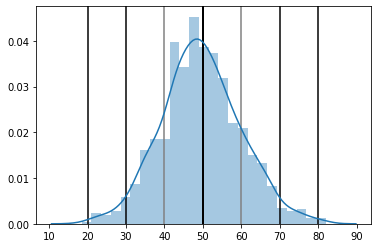

In [85]:
fig,ax = plt.subplots(1,1)
ax.axvline(mean, c='k', lw=2)
ax.axvline(mean-std, c='grey')
ax.axvline(mean+std, c='grey')
ax.axvline(mean-std*2, c='k')
ax.axvline(mean+std*2, c='k')
ax.axvline(mean-std*3, c='k')
ax.axvline(mean+std*3, c='k')
sns.distplot(norm.rvs(1000), kde=True)
plt.show()

- 68% within 1 standard deviation.
- 98% within 2 standard deviation.
- 99.7% within 3 standard deviation.

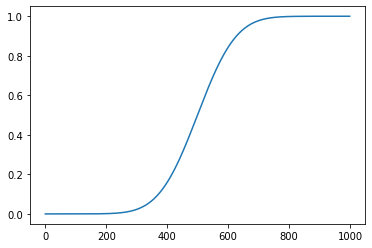

In [86]:
plt.plot(norm.cdf(data))
plt.show()

this one is just to check how rvs works. creating random variable samples.

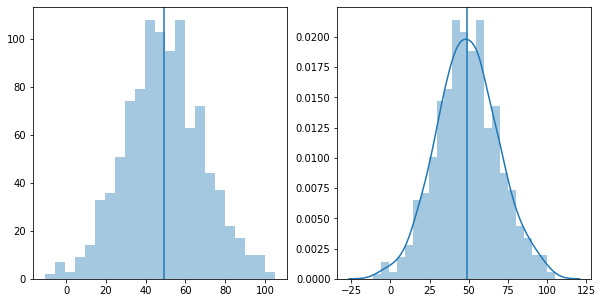

In [18]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
data = norm.rvs(1000,random_state=0)

ax[0].axvline(np.mean(data))
sns.distplot(data,kde=False,ax=ax[0])

ax[1].axvline(np.mean(data))
sns.distplot(data,kde=True,ax=ax[1])
plt.show()

### Standard normal distriution(Standardization/ Normalization/ Z)

- normal distribution with mean = 0 and standard deviation = 1.
- **Normalization Process** subtract mean and devide by the standard deviation.

<AxesSubplot:>

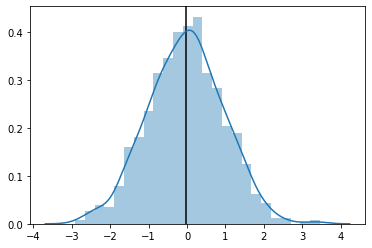

In [89]:
snd = np.random.normal(loc=0,scale=1,size=1000)

plt.axvline(snd.mean(),color='k')
sns.distplot(snd)

<AxesSubplot:>

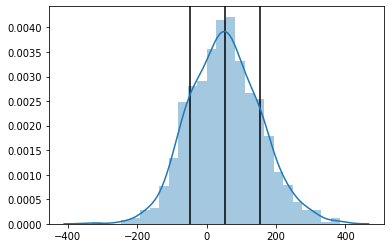

In [96]:
data = np.random.normal(loc=50,scale=100,size=1000)

plt.axvline(data.mean(),color='k')
plt.axvline(data.mean() - data.std(),color='k')
plt.axvline(data.mean() + data.std(),color='k')

sns.distplot(data)

Normalizing the data

In [94]:
snd_data = (data - data.mean()) / data.std(ddof=1)

snd_data.mean(),snd_data.std(ddof=1)

(-1.4210854715202004e-17, 0.9999999999999999)

<AxesSubplot:>

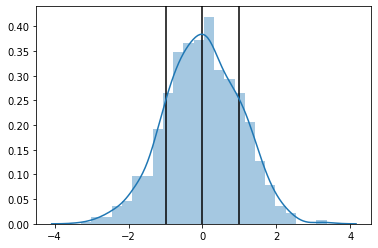

In [97]:
plt.axvline(snd_data.mean(),color='k')
plt.axvline(snd_data.mean() - snd_data.std(),color='k')
plt.axvline(snd_data.mean() + snd_data.std(),color='k')
sns.distplot(snd_data)

### Z Score

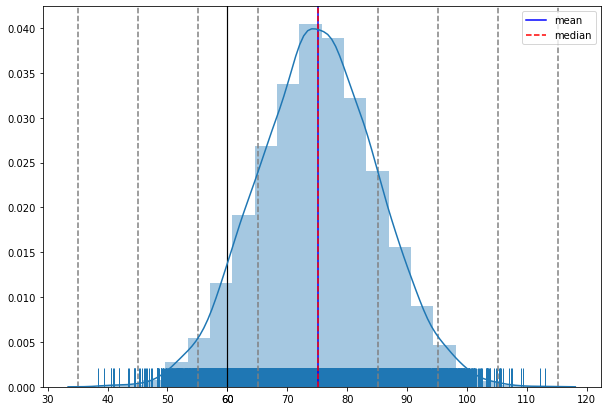

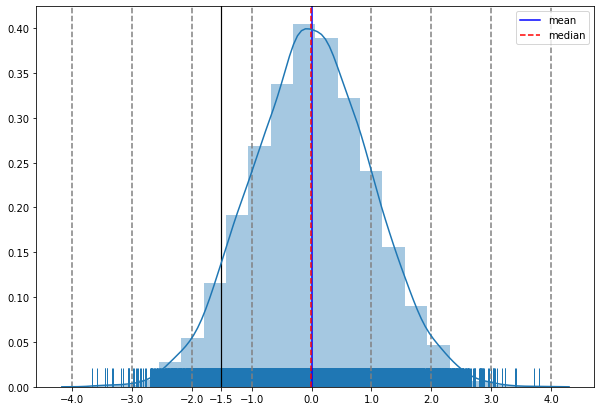

In [98]:
mu = 75
sigma = 10

bell_curve_data = np.random.normal(loc=mu,scale=sigma,size=(10000,))

def plot_distribution(data,observe_data=None):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1,1,1)

    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)

    
    for i in range(1,5):
        ax.axvline(mean + i * std_dev,c='grey',ls="--")
        ax.axvline(mean - i * std_dev,c='grey',ls="--")
        
    if observe_data is not None:
        ax.axvline(observe_data,c='black',lw=1.2,fillstyle='left')
        x_ticks = np.append(ax.get_xticks(), observe_data)
        ax.set_xticks(x_ticks)
        
    ax.axvline(mean,label="mean",c='b')
    ax.axvline(median,label="median",c="r",ls="--")
    sns.distplot(data,bins=20,rug=True,norm_hist=True)
    ax.legend()
    plt.show()
    
def plot_std_norm_distribution(data,observe_data=None):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1,1,1)

    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    
    data = (data - mean) / std_dev
    for i in range(1,5):
        ax.axvline(i,c='grey',ls="--")
        ax.axvline(-i,c='grey',ls="--")
        
    if observe_data is not None:

        observe_data = (observe_data - mean) / std_dev
        ax.axvline(observe_data,c='black',lw=1.2,fillstyle='left')
        x_ticks = np.append(ax.get_xticks(), observe_data)
        ax.set_xticks(x_ticks)
    
    median = (median - mean) / std_dev
    mean = 0
    ax.axvline(mean,label="mean",c='b')
    ax.axvline(median,label="median",c="r",ls="--")
    sns.distplot(data,bins=20,rug=True,norm_hist=True)
    ax.legend()
    plt.show()
    
plot_distribution(bell_curve_data,60)
plot_std_norm_distribution(bell_curve_data,60)

- in the curve above i can see. i need to find z-score(area under the curve from left side only) for -1.49.
- so lets look at the z score table

<img src="ZValue.png">

#### Z score table

<img src="NegativeZValues.png"/>

<img src="PositiveZValues.png"/>

- we need negative 1.49
- so from top to bottom i'll select -1.4 
- and from left to right i'll select 0.09
- i get 0.06811

#### Central Limit Theorem

- The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. 
- simply for a population, increase number of samples then distribution moves towards normal distribution.
- Central limit theorem allows normal-approximation formulas like t-distribution to be used in calculating sampling distributions ofr inference ie confidence intervals and hypothesis tests.

/home/nishant/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


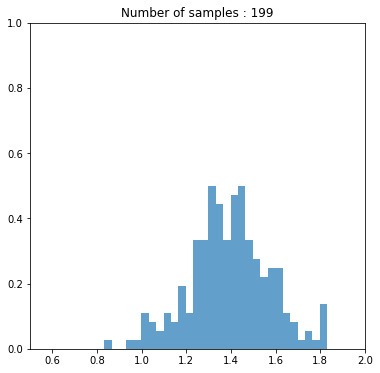

In [93]:
from scipy.stats import norm
bins = 30
sample_size = 200
norm = norm(loc=0, scale=1)
sample_data = norm.rvs(size= sample_size,random_state=10)

fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot()

ax1.set_xlim(0.5, 2)
ax1.set_ylim(0, 1)

_, _, container = ax1.hist(sample_data[:1],bins=bins,density=True,alpha=0.7)

def draw_frame(n):
    heights, _ = np.histogram(sample_data[:n], bins=bins, density=True)
    for height,rect in zip(heights,container.patches):
        rect.set_height(height)
    ax1.set_title(f"Number of samples : {n}")
    return container.patches

anim = animation.FuncAnimation(fig, draw_frame, frames=sample_size, interval=200, blit=True)

display.HTML(anim.to_html5_video())

### Chi-squared Distribution

- if a random variable $Z$ has standard normal distribution then $Z_1^2$ has the $\chi^2$ distribution with one degree of freedom
- if a random variable $Z$ has standard normal distribution then $Z_1^2 + Z_2^2$ has the $\chi^2$ distribution with two degree of freedom
- if $Z_1,Z_2,...,Z_k$ are independent standard normal (distribution) random variables then $Z_1^2 + Z_2^2 + ... + Z_k^2$ has the $\chi^2$ distribution with k degrees of freedom


$f(x)=\frac{x^{\frac{k}{2} - 1}. e^{\frac{-x}{2}}}{2^{\frac{k}{2}}. \Gamma{(\frac{k}{2})}}$

for x>0

k = degree of freedom

$\Gamma(x)=(x-1)!$  Gamma Function

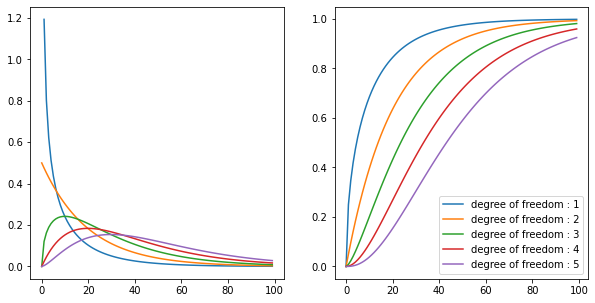

In [12]:
from scipy.stats import chi2

fig,ax = plt.subplots(1,2,figsize=(10,5))
for dof in range(1,6):
    data = np.linspace(start=0, stop=10, num=100)
    chi2_dist = chi2(dof)
    
    ax[0].plot(chi2_dist.pdf(data),label=f"degree of freedom : {dof}")
    ax[1].plot(chi2_dist.cdf(data),label=f"degree of freedom : {dof}")
plt.legend(loc="best")
plt.show()

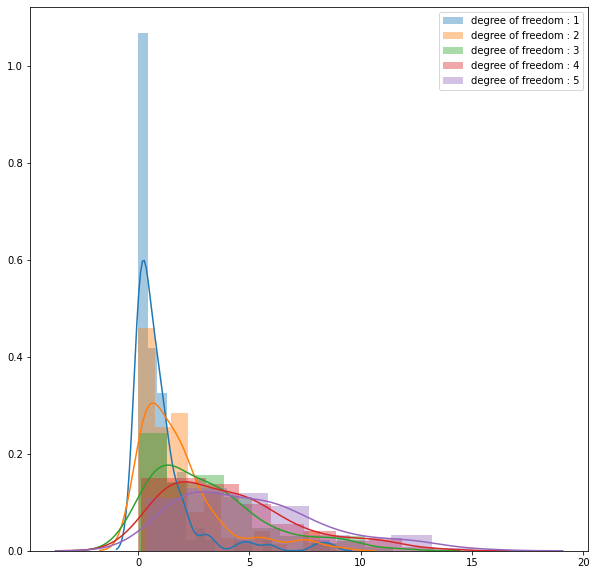

In [13]:
plt.figure(figsize=(10,10))
for dof in range(1,6):
    chi2_dist = chi2(dof)
    data = chi2_dist.rvs(100,random_state=0)
    sns.distplot(data,label=f"degree of freedom : {dof}")
plt.legend(loc='best')
plt.show()

### F Distribution

suppose $U_1$ has $\chi^2$ distribution with $df_1$ degrees of freedom \
and $U_2$ has $\chi^2$ distribution with $df_2$ degrees of freedom \
then $F=\frac{\frac{U_1}{df_1}}{\frac{U_2}{df_2}}$ has an F distribution\

$f(x, df_1, df_2) = \frac{df_2^{df_2/2} df_1^{df_1/2} x^{df_1 / 2-1}}{(df_2+df_1 x)^{(df_1+df_2)/2}B(df_1/2, df_2/2)}$
                             

In [14]:
from scipy.stats import f

dfn, dfd = 29, 18 #degree of fre
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

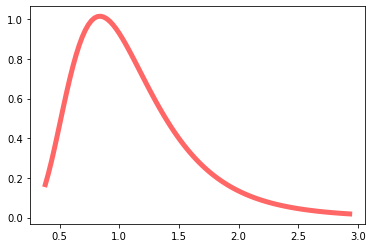

In [15]:
x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
plt.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

### T Distribition

suppose -> Z has standard normal distribution U has the $\chi^2$ distribution with $\nu$ degree of freedom.

Z and U are independent.

$T=\frac{Z}{\sqrt{\frac{U}{V}}}$ has the t distribution with $\nu$ degree of freedom

$f(x, \nu) = \frac{\Gamma((\nu+1)/2)}
                    {\sqrt{\pi \nu} \Gamma(\nu/2)}
                (1+t/\nu)^{-(\nu+1)/2}$
                
$\mu=0$ for $\nu$ > 1 \
$\sigma^2=\frac{\nu}{\nu - 2}$ for ${\nu}$ > 2 

- As degree of freedom increases t distribution tends towards the standard normal distribution

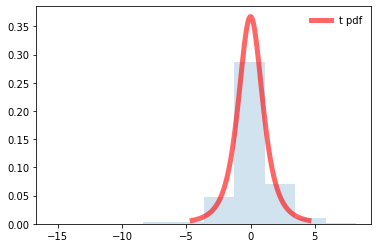

In [16]:
from scipy.stats import t
fig, ax = plt.subplots(1, 1)
df = 3
mean, var, skew, kurt = t.stats(df, moments='mvsk')

x = np.linspace(t.ppf(0.01, df),

                t.ppf(0.99, df), 100)

ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')

ax.hist( t.rvs(df, size=1000), density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

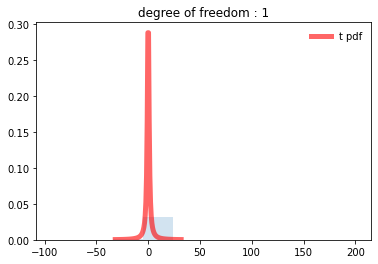

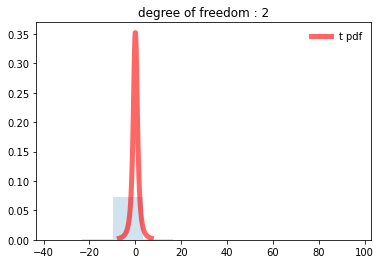

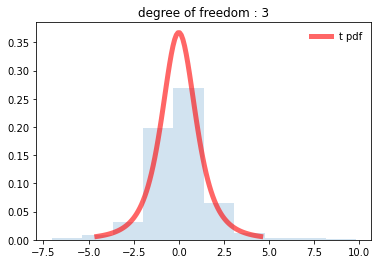

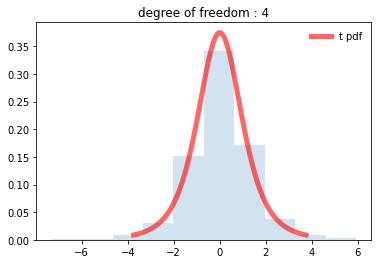

In [17]:
for df in range(1,5):
                
    fig, ax = plt.subplots(1, 1)
    mean, var, skew, kurt = t.stats(df, moments='mvsk')

    x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)

    ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')

    ax.hist( t.rvs(df, size=1000), density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best', frameon=False)
    plt.title(f"degree of freedom : {df}")
    plt.show()

### Uniform Distribution

A continuous random variable X is said to have a Uniform distribution over the interval [a,b], shown as 

\begin{align}
    X &\sim U(a,b) \text{ if its PDF is given by}\\ 
    f(x) &= \begin{cases}
                \frac{1}{b-a} && a \le x \le b\\ 
                0 && \text{ else}\\
            \end{cases}\\ 
    \mu &= \frac{a+b}{2}\\
    \sigma^2 &= \frac{1}{12}{(b-a)^2}
\end{align}

In [8]:
from scipy.stats import uniform

uniform_dist = uniform(loc=50,scale=10)

In [9]:
mean, var, skew, kurt = uniform_dist.stats(moments='mvsk')
mean, var, skew, kurt

(array(55.), array(8.33333333), array(0.), array(-1.2))

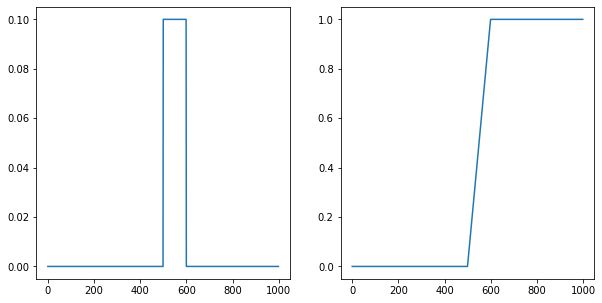

In [10]:
data = np.linspace(start=0, stop=100, num=1000)

fig,ax = plt.subplots(1,2,figsize=(10,5))


ax[0].plot(uniform_dist.pdf(data))

ax[1].plot(uniform_dist.cdf(data))
plt.show()

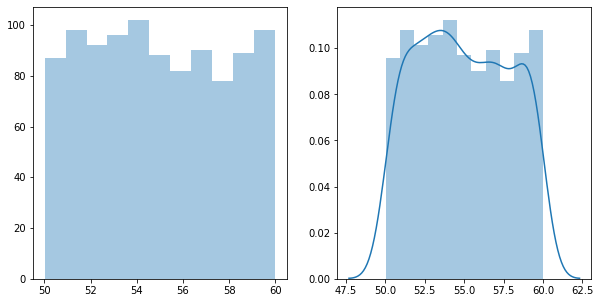

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(uniform_dist.rvs(1000,random_state=0),kde=False,ax=ax[0])
sns.distplot(uniform_dist.rvs(1000,random_state=0),kde=True,ax=ax[1])
plt.show()

## Discrete Distribution
### Binomial Distribution

- n repeated trials
- 2 outcomes only
- probability of success = p
- independent trials

        x = number of success results 
        n = number of trials
        p = probability of success
        q = (1 - p) failure
        
The frequency distribution of the possible number of successful outcomes in a given number of trials, where the probability of success is same in each of them.

$b(x;n,p)=\binom{n}{x}{p^x}{(1-p)}^{(n-x)}$

$\mu=np$

$\sigma^2=npq$

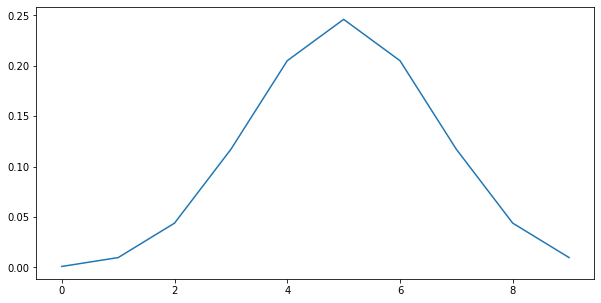

In [18]:
from scipy.stats import binom
## n and p as shape parameters 
n,p = 10, 0.5
binom_dist = binom(n = n,p =p)
data = range(n)
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(binom_dist.pmf(data))
plt.show()

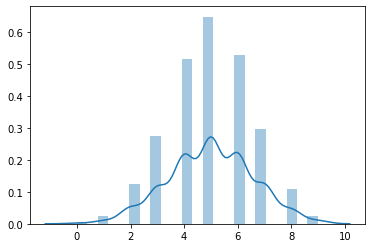

In [19]:
sns.distplot(binom_dist.rvs(1000,random_state=1))
plt.show()

### Poisson Distribution

- Results -> success/fail 
- Average number of successes($\mu$) that occurs in a specified region is known

$f(x;\mu) = \exp(-\mu) \frac{\mu^x}{x!}$

e = 2.718 \
$\mu$ = mean number of successes \
x = actual number of successes

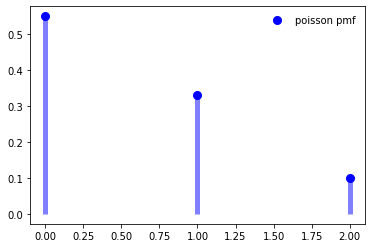

In [20]:
from scipy.stats import poisson

fig, ax = plt.subplots(1, 1)

mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu),poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

ax.legend(loc='best', frameon=False)
plt.show()